# Pylväskaavioita

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

df = pd.read_excel('http://taanila.fi/data1.xlsx', sheet_name = 'Data')
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [2]:
#frekvenssitaulukko koulutukselle
df1 = df['koulutus'].value_counts(sort = False).to_frame()
df1.index = ['peruskoulu','2.aste','korkeakoulu','ylempi korkeakoulu']
df1 = df1.rename(columns = {'koulutus': 'lkm'})
n=df1['lkm'].sum()
df1['%'] = df1['lkm'] / n * 100
df1.style.format({'%': '{:,.1f} %'})

,lkm,%
peruskoulu,27,33.3 %
2.aste,30,37.0 %
korkeakoulu,22,27.2 %
ylempi korkeakoulu,2,2.5 %


Text(0.5,0,'prosenttia (n=81)')

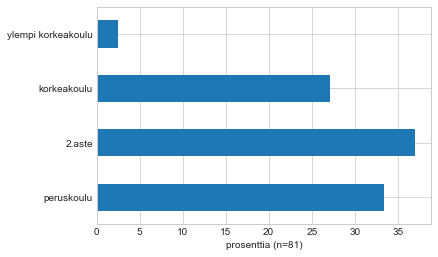

In [3]:
#koulutusten frekvenssit pylväinä
df1['%'].plot.barh(color='C0')
plt.xlabel('prosenttia (n='+str(n)+')')

In [4]:
#ikäluokkien frekvenssit
df3 = df['ikä'].value_counts(sort = False, bins = [20,29,39,49,59,70]).to_frame()
df3

,ikä
"(19.999, 29.0]",17
"(29.0, 39.0]",30
"(39.0, 49.0]",23
"(49.0, 59.0]",11
"(59.0, 70.0]",1


Text(0,0.5,'Lukumäärä')

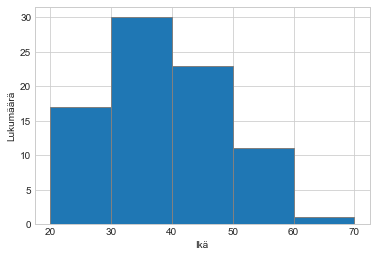

In [5]:
#historgrammin ikäluokittain voin tehdä suoraan alkuperäisestä aineistosta
#ikäluokat samat kuin yllä lasketussa taulukossa: [20,30); [30,40); [40,40); [50,60); [60,70]
df['ikä'].plot.hist(bins=[20,30,40,50,60,70], edgecolor='grey')
plt.xlabel('Ikä')
plt.ylabel('Lukumäärä')

C:\Users\Aki\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0,0,'0 %'),
 Text(0,0,'20 %'),
 Text(0,0,'40 %'),
 Text(0,0,'60 %'),
 Text(0,0,'80 %'),
 Text(0,0,'100 %'),
 Text(0,0,'120 %')]

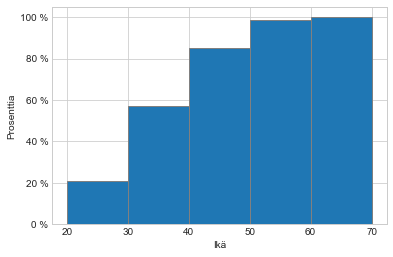

In [6]:
#histogrammin voin esittää myös kumulatiivisena
#normed-argumentilla lukumäärät näytetään prosentteina
ax=df['ikä'].plot.hist(cumulative=True, bins=[20,30,40,50,60,70], normed=1, edgecolor='grey')
plt.xlabel('Ikä')
plt.ylabel('Prosenttia')

#prosenttien ulkoasun muotoilu vaatii omat kikkailunsa:
vals = ax.get_yticks()
ax.set_yticklabels(['{:.0f} %'.format(y*100) for y in vals])

In [7]:
#monivalintakysymyksen valintojen lukumäärät suuruusjärjestyksessä
df5 = df[['työterv','lomaosa','kuntosa','hieroja']].sum().sort_values(ascending = True).to_frame()
df5 = df5.rename(columns = {0: 'lkm'})
df5.style.format('{:.0f}')

,lkm
kuntosa,9
lomaosa,20
hieroja,22
työterv,47


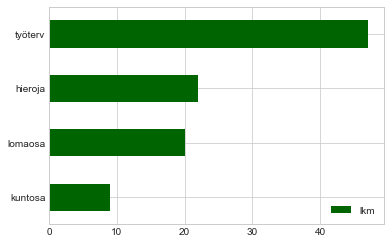

In [8]:
#taulukon alin arvo näkyy aina vaakapylväskaaviossa ylimpänä pylväänä
df5.plot.barh(color='darkgreen')

In [9]:
#sukupuolen ja koulutuksen ristiintaulukointi
df6 = pd.crosstab(df['koulutus'], df['sukup'])
df6.index = ['peruskoulu','2.aste','korkeakoulu','ylempi korkeakoulu']
df6.columns = ['mies','nainen']
df6

,mies,nainen
peruskoulu,22,5
2.aste,23,7
korkeakoulu,15,7
ylempi korkeakoulu,2,0


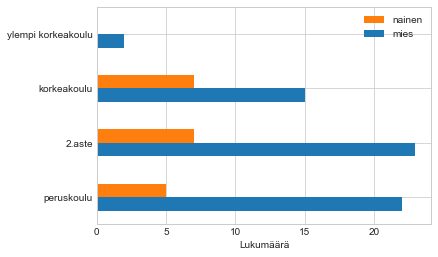

In [10]:
#ristiintaulukointi pylväinä
ax=df6.plot.barh()
plt.xlabel('Lukumäärä')

#seuraavan tarvitsen, jos haluan värien olevan selitteessä pylväiden mukaisessa järjestyksessä (punainen ylempänä) 
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='best')

In [11]:
#ristiintaulukointi prosentteina
df7 = pd.crosstab(df['koulutus'], df['sukup'], margins = True, normalize = 'columns')
df7.index = ['peruskoulu','2.aste','korkeakoulu','ylempi korkeakoulu']
df7.columns = ['mies','nainen','yhteensä']
df7.style.format('{:.1%}')

,mies,nainen,yhteensä
peruskoulu,35.5%,26.3%,33.3%
2.aste,37.1%,36.8%,37.0%
korkeakoulu,24.2%,36.8%,27.2%
ylempi korkeakoulu,3.2%,0.0%,2.5%


[Text(0,0,'0 %'),
 Text(0,0,'20 %'),
 Text(0,0,'40 %'),
 Text(0,0,'60 %'),
 Text(0,0,'80 %'),
 Text(0,0,'100 %'),
 Text(0,0,'120 %')]

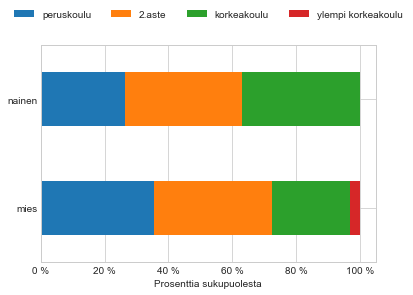

In [12]:
ax=df7[['mies','nainen']].transpose().plot.barh(stacked=True)
plt.xlabel('Prosenttia sukupuolesta')

#selitteen asettaminen sopivaan kohtaan kuvion ulkopuolelle on konstikasta
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=4)

#prosenttien ulkoasun muotoilu vaatii omat kikkailunsa
vals = ax.get_xticks()
ax.set_xticklabels(['{:.0f} %'.format(x*100) for x in vals])

In [13]:
#monivalinnan vaihtoehtojen lukumäärät sukupuolen mukaan
df9 = df.groupby('sukup')['työterv','lomaosa','kuntosa','hieroja'].sum()
df9.index = ['mies','nainen']
df9.style.format('{:.0f}')

,työterv,lomaosa,kuntosa,hieroja
mies,35,16,8,13
nainen,12,4,1,9


(array([0, 1]), <a list of 2 Text xticklabel objects>)

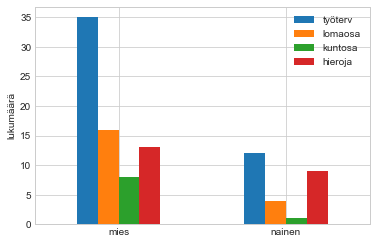

In [14]:
df9.plot.bar()
plt.ylabel('lukumäärä')
plt.xticks(rotation='horizontal')

In [15]:
#prosentit sukupuolesta
df10 = df.groupby('sukup')['työterv','lomaosa','kuntosa','hieroja'].sum()
df10.index = ['mies','nainen']
miehet = df['sukup'].value_counts()[1]
naiset = df['sukup'].value_counts()[2]
df10.loc['mies'] = df10.loc['mies'] / miehet
df10.loc['nainen'] = df10.loc['nainen'] / naiset
df10.style.format('{:.1%}')

,työterv,lomaosa,kuntosa,hieroja
mies,55.6%,25.4%,12.7%,20.6%
nainen,63.2%,21.1%,5.3%,47.4%


[Text(0,0,'0 %'),
 Text(0,0,'10 %'),
 Text(0,0,'20 %'),
 Text(0,0,'30 %'),
 Text(0,0,'40 %'),
 Text(0,0,'50 %'),
 Text(0,0,'60 %'),
 Text(0,0,'70 %')]

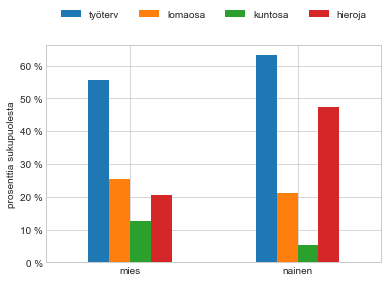

In [16]:
ax=df10.plot.bar()
plt.ylabel('prosenttia sukupuolesta')
plt.xticks(rotation='horizontal')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=4)

vals = ax.get_yticks()
ax.set_yticklabels(['{:.0f} %'.format(x*100) for x in vals])

[Text(0,0,'0 %'),
 Text(0,0,'10 %'),
 Text(0,0,'20 %'),
 Text(0,0,'30 %'),
 Text(0,0,'40 %'),
 Text(0,0,'50 %'),
 Text(0,0,'60 %'),
 Text(0,0,'70 %')]

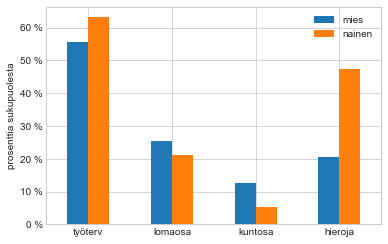

In [17]:
ax=df10.transpose().plot.bar()
plt.ylabel('prosenttia sukupuolesta')
plt.xticks(rotation='horizontal')

vals = ax.get_yticks()
ax.set_yticklabels(['{:.0f} %'.format(x*100) for x in vals])

In [18]:
#koontitaulukko tyytyväisyyksistä
df11=df['johto'].value_counts(sort = False).to_frame()
df11['työtov'] = df['työtov'].value_counts(sort = False)
df11['työymp'] = df['työymp'].value_counts(sort = False)
df11['palkkat'] = df['palkkat'].value_counts(sort = False)
df11['työteht'] = df['työteht'].value_counts(sort = False)
df11.index = ['erittäin tyytymätön','tyytymätön','neutraali',
          'tyytyväinen','erittäin tyytyväinen']
df11

,johto,työtov,työymp,palkkat,työteht
erittäin tyytymätön,7,NaN,9,33,5
tyytymätön,16,3.0,9,19,15
neutraali,30,16.0,30,19,29
tyytyväinen,23,35.0,23,10,25
erittäin tyytyväinen,6,27.0,11,1,8


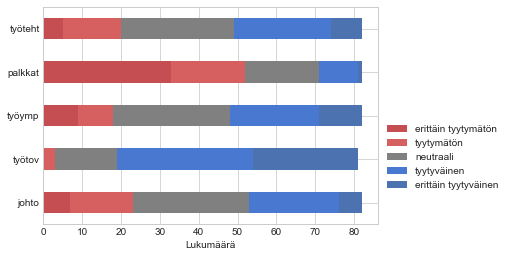

In [19]:
df11.transpose().plot.barh(stacked=True, color=['#C44E52','#D65F5F','grey','#4878CF','#4C72B0'])
plt.xlabel('Lukumäärä')
plt.legend(bbox_to_anchor=(1, 0.5))

[Text(0,0,'erittäin tyytymätön'),
 Text(0,0,'tyytymätön'),
 Text(0,0,'neutraali'),
 Text(0,0,'tyytyväinen'),
 Text(0,0,'erittäin tyytyväinen')]

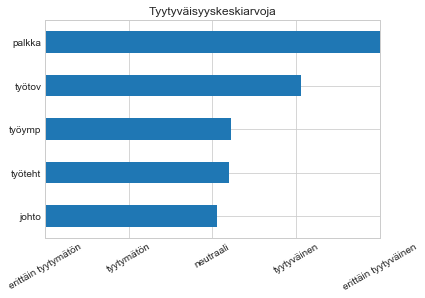

In [20]:
df12=df[['johto','työtov','työymp','palkka','työteht']].mean().sort_values()
ax=df12.plot.barh(color='C0')
plt.xlim(1,5)
plt.title('Tyytyväisyyskeskiarvoja')
ax.set(xticks=[1,2,3,4,5])
ax.set_xticklabels(['erittäin tyytymätön','tyytymätön','neutraali','tyytyväinen','erittäin tyytyväinen'], rotation=30)